# Drawings for Presentation

In [1]:
seconds_per_sentence = 0.7962962962962963

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle
import h5py
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [4]:
# Import the Cosine Scores
with open('Step2-Signal/6-link_dict.pickle', 'rb') as f:
    parsed = pickle.load(f)

In [17]:
sample = parsed['0000006201']
sample

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim
49,0000006201-21-000014,2021-02-17,2020-12-31,2021-02-17T17:17:57.000Z,34,10-K,001-08400,21646186,,43925703,1,1,aal-20201231.htm,10-K 2020 02.17.21,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(158292, 158310), Item 7. Management], [(167...","[[(502641, 502662), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.955566
150,0000006201-20-000023,2020-02-19,2019-12-31,2020-02-19T07:31:30.000Z,34,10-K,001-08400,20627428,,30851334,1,1,a10k123119.htm,10-K 2019 02.19.20,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(153128, 153146), Item 7. Management], [(156...","[[(414897, 414918), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.727067
225,0000006201-19-000009,2019-02-25,2018-12-31,2019-02-25T07:31:34.000Z,34,10-K,001-08400,19628071,,30572408,1,0,a10k123118.htm,10-K 2018 02.25.19,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9505, 9523), Item 7. Management], [(12796, ...","[[(300867, 300888), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.969910
315,0000006201-18-000009,2018-02-21,2017-12-31,2018-02-21T08:02:40.000Z,34,10-K,001-08400,18627088,,27914491,1,0,a10k123117.htm,10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9554, 9572), Item 7. Management], [(13606, ...","[[(293380, 293401), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.866968
412,0001193125-17-051216,2017-02-22,2016-12-31,2017-02-22T08:01:43.000Z,34,10-K,001-08400,17627073,,24888480,1,0,d286458d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9935, 9953), Item 7. Management], [(14047, ...","[[(297249, 297270), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISKFACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.842400
538,0001193125-16-474605,2016-02-24,2015-12-31,2016-02-24T08:04:10.000Z,34,10-K,001-08400,161450518,,26170400,1,0,d78287d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(17027, 17045), Item 7. Management], [(21453...","[[(398001, 398022), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.484949
651,0001193125-15-061145,2015-02-25,2014-12-31,2015-02-25T08:02:34.000Z,34,10-K,001-08400,15645918,,39524925,1,0,d829913d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(16174, 16192), Item 7. Management], [(23008...","[[(452689, 452710), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk ...,,0.765215
750,0000006201-14-000004,2014-02-28,2013-12-31,2014-02-28T07:52:16.000Z,34,10-K,001-08400,14651496,,47888955,1,0,aagaa10k-20131231.htm,10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(15590, 15608), Item 7. Management], [(23363...",[],ITEM 1A. RISK FACTORS Below are certain risk ...,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,NaN


In [85]:
sample

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim
90,0001555280-21-000098,2021-02-16,2020-12-31,2021-02-16T14:24:47.000Z,34,10-K,001-35797,21636290,,18961290,1,1,zts-20201231.htm,10-K,https://www.sec.gov/Archives/edgar/data/155528...,"[[(41377, 41395), Item 7. Management], [(25338...","[[(41475, 41492), Item 8. Financial], [(253884...",Item 1A. Risk Factors. In addition to the othe...,Item 7. Management’s Discussion and Analysis o...,0.993472
277,0001555280-20-000054,2020-02-13,2019-12-31,2020-02-13T15:13:44.000Z,34,10-K,001-35797,20609808,,21406402,1,1,zoetis-20191231x10kye.htm,10-K,https://www.sec.gov/Archives/edgar/data/155528...,"[[(43239, 43257), Item 7. Management], [(47908...","[[(43406, 43423), Item 8. Financial], [(48006,...",Item 1A. Risk Factors. In addition to the oth...,Item 7. Management’s Discussion and Analysis o...,0.986949
428,0001555280-19-000041,2019-02-14,2018-12-31,2019-02-14T17:08:33.000Z,34,10-K,001-35797,19608112,,19494677,1,0,zoetis-20181231x10kye.htm,10-K,https://www.sec.gov/Archives/edgar/data/155528...,"[[(4546, 4564), Item 7. Management], [(9214, 9...","[[(4713, 4730), Item 8. Financial], [(9312, 93...",Item 1A. Risk Factors. In addition to the oth...,Item 7. Management’s Discussion and Analysis o...,0.991874
572,0001555280-18-000053,2018-02-15,2017-12-31,2018-02-15T12:31:15.000Z,34,10-K,001-35797,18616883,,18267949,1,0,zoetis-20171231x10kye.htm,10-K,https://www.sec.gov/Archives/edgar/data/155528...,"[[(4673, 4691), Item 7. Management], [(9215, 9...","[[(4840, 4857), Item 8. Financial], [(9313, 93...",Item 1A. Risk Factors. In addition to the oth...,Item 7. Management’s Discussion and Analysis o...,0.992338
683,0001555280-17-000044,2017-02-16,2016-12-31,2017-02-16T16:26:45.000Z,34,10-K,001-35797,17618235,,18284297,1,0,zoetis-20161231x10kye.htm,10-K,https://www.sec.gov/Archives/edgar/data/155528...,"[[(4306, 4324), Item 7. Management], [(9510, 9...","[[(4473, 4490), Item 8. Financial], [(173313, ...",Item 1A. Risk Factors. In addition to the oth...,Item 7. Management’s Discussion and Analysis o...,0.987881
783,0001555280-16-000344,2016-02-24,2015-12-31,2016-02-24T11:32:51.000Z,34,10-K,001-35797,161450905,,19416727,1,0,zoetis-20151231x10kye.htm,10-K,https://www.sec.gov/Archives/edgar/data/155528...,"[[(4340, 4358), Item 7. Management], [(10757, ...","[[(4507, 4524), Item 8. Financial], [(179658, ...",Item 1A. Risk Factors. In addition to the oth...,Item 7. Management’s Discussion and Analysis o...,0.983723
927,0001555280-15-000057,2015-02-27,2014-12-31,2015-02-27T16:52:38.000Z,34,10-K,001-35797,15660089,,24724525,1,0,zoetis-20141231x10kye.htm,10-K,https://www.sec.gov/Archives/edgar/data/155528...,"[[(4345, 4363), Item 7. Management], [(183890,...","[[(4512, 4529), Item 8. Financial], [(182026, ...",Item 1A. Risk Factors. In addition to the oth...,Item 7. Management’s Discussion and Analysis o...,


In [180]:
items_lens = {}
for company in parsed.keys():
    company_lens = []
    sample = parsed[company]
    sample = sample.fillna('')
    for i in range(len(sample)):
        vals = list(sample.loc[sample.index[i], ['Item1a', 'Item7']].values)
    #vals = ['' if np.isnan(x) else x for x in val1]
    #vals[vals == np.nan] = ''
        words = [x.split(' ') for x in vals]
        remove_blanks = [x for x in words if x != '']
        company_lens.append(sum([len(x) for x in remove_blanks]))
    parsed[company]['Lengths'] = company_lens
    

In [182]:
parsed['0000006201']

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,...,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim,Lengths
49,0000006201-21-000014,2021-02-17,2020-12-31,2021-02-17T17:17:57.000Z,34,10-K,001-08400,21646186,,43925703,...,1,aal-20201231.htm,10-K 2020 02.17.21,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(158292, 158310), Item 7. Management], [(167...","[[(502641, 502662), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.955566,43187
150,0000006201-20-000023,2020-02-19,2019-12-31,2020-02-19T07:31:30.000Z,34,10-K,001-08400,20627428,,30851334,...,1,a10k123119.htm,10-K 2019 02.19.20,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(153128, 153146), Item 7. Management], [(156...","[[(414897, 414918), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.727067,35186
225,0000006201-19-000009,2019-02-25,2018-12-31,2019-02-25T07:31:34.000Z,34,10-K,001-08400,19628071,,30572408,...,0,a10k123118.htm,10-K 2018 02.25.19,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9505, 9523), Item 7. Management], [(12796, ...","[[(300867, 300888), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.969910,22129
315,0000006201-18-000009,2018-02-21,2017-12-31,2018-02-21T08:02:40.000Z,34,10-K,001-08400,18627088,,27914491,...,0,a10k123117.htm,10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9554, 9572), Item 7. Management], [(13606, ...","[[(293380, 293401), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.866968,22965
412,0001193125-17-051216,2017-02-22,2016-12-31,2017-02-22T08:01:43.000Z,34,10-K,001-08400,17627073,,24888480,...,0,d286458d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9935, 9953), Item 7. Management], [(14047, ...","[[(297249, 297270), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISKFACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.842400,41353
538,0001193125-16-474605,2016-02-24,2015-12-31,2016-02-24T08:04:10.000Z,34,10-K,001-08400,161450518,,26170400,...,0,d78287d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(17027, 17045), Item 7. Management], [(21453...","[[(398001, 398022), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.484949,33777
651,0001193125-15-061145,2015-02-25,2014-12-31,2015-02-25T08:02:34.000Z,34,10-K,001-08400,15645918,,39524925,...,0,d829913d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(16174, 16192), Item 7. Management], [(23008...","[[(452689, 452710), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk ...,,0.765215,18144
750,0000006201-14-000004,2014-02-28,2013-12-31,2014-02-28T07:52:16.000Z,34,10-K,001-08400,14651496,,47888955,...,0,aagaa10k-20131231.htm,10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(15590, 15608), Item 7. Management], [(23363...",[],ITEM 1A. RISK FACTORS Below are certain risk ...,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,NaN,48603


In [183]:
# Flatten into a single df
df = pd.concat(parsed, axis=0).reset_index()
df.head()

,level_0,level_1,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,...,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim,Lengths
0,0000006201,49,0000006201-21-000014,2021-02-17,2020-12-31,2021-02-17T17:17:57.000Z,34,10-K,001-08400,21646186,...,1.0,aal-20201231.htm,10-K 2020 02.17.21,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(158292, 158310), Item 7. Management], [(167...","[[(502641, 502662), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.955566,43187
1,0000006201,150,0000006201-20-000023,2020-02-19,2019-12-31,2020-02-19T07:31:30.000Z,34,10-K,001-08400,20627428,...,1.0,a10k123119.htm,10-K 2019 02.19.20,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(153128, 153146), Item 7. Management], [(156...","[[(414897, 414918), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.727067,35186
2,0000006201,225,0000006201-19-000009,2019-02-25,2018-12-31,2019-02-25T07:31:34.000Z,34,10-K,001-08400,19628071,...,0.0,a10k123118.htm,10-K 2018 02.25.19,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9505, 9523), Item 7. Management], [(12796, ...","[[(300867, 300888), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.969910,22129
3,0000006201,315,0000006201-18-000009,2018-02-21,2017-12-31,2018-02-21T08:02:40.000Z,34,10-K,001-08400,18627088,...,0.0,a10k123117.htm,10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9554, 9572), Item 7. Management], [(13606, ...","[[(293380, 293401), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.866968,22965
4,0000006201,412,0001193125-17-051216,2017-02-22,2016-12-31,2017-02-22T08:01:43.000Z,34,10-K,001-08400,17627073,...,0.0,d286458d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9935, 9953), Item 7. Management], [(14047, ...","[[(297249, 297270), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISKFACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.842400,41353


In [184]:
df.columns = ['company', 'doc_idx'] + list(df.columns[2:])
df.head()

,company,doc_idx,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,...,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim,Lengths
0,0000006201,49,0000006201-21-000014,2021-02-17,2020-12-31,2021-02-17T17:17:57.000Z,34,10-K,001-08400,21646186,...,1.0,aal-20201231.htm,10-K 2020 02.17.21,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(158292, 158310), Item 7. Management], [(167...","[[(502641, 502662), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.955566,43187
1,0000006201,150,0000006201-20-000023,2020-02-19,2019-12-31,2020-02-19T07:31:30.000Z,34,10-K,001-08400,20627428,...,1.0,a10k123119.htm,10-K 2019 02.19.20,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(153128, 153146), Item 7. Management], [(156...","[[(414897, 414918), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.727067,35186
2,0000006201,225,0000006201-19-000009,2019-02-25,2018-12-31,2019-02-25T07:31:34.000Z,34,10-K,001-08400,19628071,...,0.0,a10k123118.htm,10-K 2018 02.25.19,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9505, 9523), Item 7. Management], [(12796, ...","[[(300867, 300888), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.969910,22129
3,0000006201,315,0000006201-18-000009,2018-02-21,2017-12-31,2018-02-21T08:02:40.000Z,34,10-K,001-08400,18627088,...,0.0,a10k123117.htm,10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9554, 9572), Item 7. Management], [(13606, ...","[[(293380, 293401), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.866968,22965
4,0000006201,412,0001193125-17-051216,2017-02-22,2016-12-31,2017-02-22T08:01:43.000Z,34,10-K,001-08400,17627073,...,0.0,d286458d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9935, 9953), Item 7. Management], [(14047, ...","[[(297249, 297270), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISKFACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.842400,41353


In [185]:
df['filingDate'] = pd.to_datetime(df['filingDate'])
df = df.sort_values(['filingDate'])

In [186]:
df.head()

,company,doc_idx,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,...,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim,Lengths
88,0000003333,450,0000891020-96-000318,1996-04-08,1996-02-01,1996-04-08T00:00:00.000Z,,10-K,001-06187,96545040,...,0.0,,10-K FOR ALBERTSON'S INC. FOR PERIOD ENDING 2-...,https://www.sec.gov/Archives/edgar/data/3333/0...,[],[],,,NaN,2
4224,0000764762,631,0000912057-96-006709,1996-04-19,1996-01-25,1996-04-19T00:00:00.000Z,,10-K,001-08978,96548712,...,0.0,,FORM 10-K,https://www.sec.gov/Archives/edgar/data/764762...,[],[],,,NaN,2
4546,0000063416,472,0000063416-96-000013,1996-04-24,1996-02-03,1996-04-24T00:00:00.000Z,,10-K,000-20621,96550248,...,0.0,,1995 FORM 10-K,https://www.sec.gov/Archives/edgar/data/63416/...,[],[],,,NaN,2
3041,0000043300,906,0000043300-96-000015,1996-05-24,1996-02-24,1996-05-24T00:00:00.000Z,,10-K,001-04141,96572453,...,0.0,,,https://www.sec.gov/Archives/edgar/data/43300/...,[],[],,,NaN,2
2611,0000846909,345,0000846909-96-000018,1996-05-29,1996-02-29,1996-05-29T00:00:00.000Z,,10-K,001-10228,96573618,...,0.0,,FORM 1O-K,https://www.sec.gov/Archives/edgar/data/846909...,[],[],,,NaN,2


In [187]:
df.groupby(df['filingDate'].dt.year)['Lengths'].agg(lambda x: x.eq(2).sum())

filingDate
1996.0    18
1997.0    53
1998.0    58
1999.0    60
2000.0    67
2001.0    24
2002.0     6
2003.0     9
2004.0     5
2005.0     6
2006.0     3
2007.0     2
2008.0     1
2009.0     2
2010.0     5
2011.0     4
2012.0     3
2013.0     2
2014.0     3
2015.0     7
2016.0     5
2017.0     7
2018.0    11
2019.0     7
2020.0     8
2021.0     5
Name: Lengths, dtype: int64

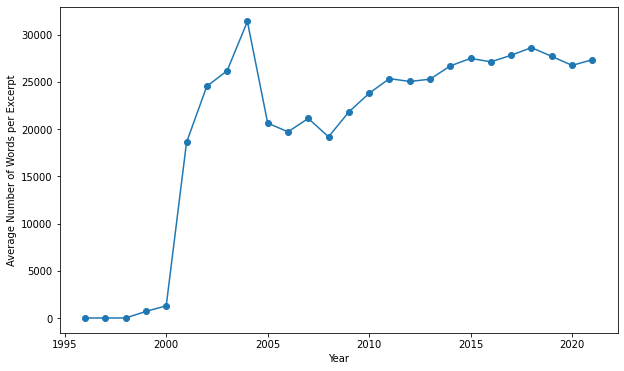

In [188]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.groupby(df['filingDate'].dt.year)['Lengths'].mean(), marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Average Number of Words per Excerpt')
plt.show()

In [189]:
df

,company,doc_idx,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,...,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim,Lengths
88,0000003333,450,0000891020-96-000318,1996-04-08,1996-02-01,1996-04-08T00:00:00.000Z,,10-K,001-06187,96545040,...,0.0,,10-K FOR ALBERTSON'S INC. FOR PERIOD ENDING 2-...,https://www.sec.gov/Archives/edgar/data/3333/0...,[],[],,,NaN,2
4224,0000764762,631,0000912057-96-006709,1996-04-19,1996-01-25,1996-04-19T00:00:00.000Z,,10-K,001-08978,96548712,...,0.0,,FORM 10-K,https://www.sec.gov/Archives/edgar/data/764762...,[],[],,,NaN,2
4546,0000063416,472,0000063416-96-000013,1996-04-24,1996-02-03,1996-04-24T00:00:00.000Z,,10-K,000-20621,96550248,...,0.0,,1995 FORM 10-K,https://www.sec.gov/Archives/edgar/data/63416/...,[],[],,,NaN,2
3041,0000043300,906,0000043300-96-000015,1996-05-24,1996-02-24,1996-05-24T00:00:00.000Z,,10-K,001-04141,96572453,...,0.0,,,https://www.sec.gov/Archives/edgar/data/43300/...,[],[],,,NaN,2
2611,0000846909,345,0000846909-96-000018,1996-05-29,1996-02-29,1996-05-29T00:00:00.000Z,,10-K,001-10228,96573618,...,0.0,,FORM 1O-K,https://www.sec.gov/Archives/edgar/data/846909...,[],[],,,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,0001438893,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4235,0000806085,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4341,0001323206,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6388,0000798738,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [211]:
temp = df.copy()
temp['year'] = [int(x) if not np.isnan(x) else np.nan for x in df['filingDate'].dt.year]
temp.loc[:,'year'] = temp.loc[:,'year'].fillna(0)
temp['year'] = [int(x) for x in temp['year']]

In [213]:
Q1 = temp['Lengths'].quantile(0.25)
Q3 = df['Lengths'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['Lengths'] >= Q1 - 1.5 * IQR) & (df['Lengths'] <= Q3 + 1.5 *IQR)
temp2 = temp.loc[filter]  

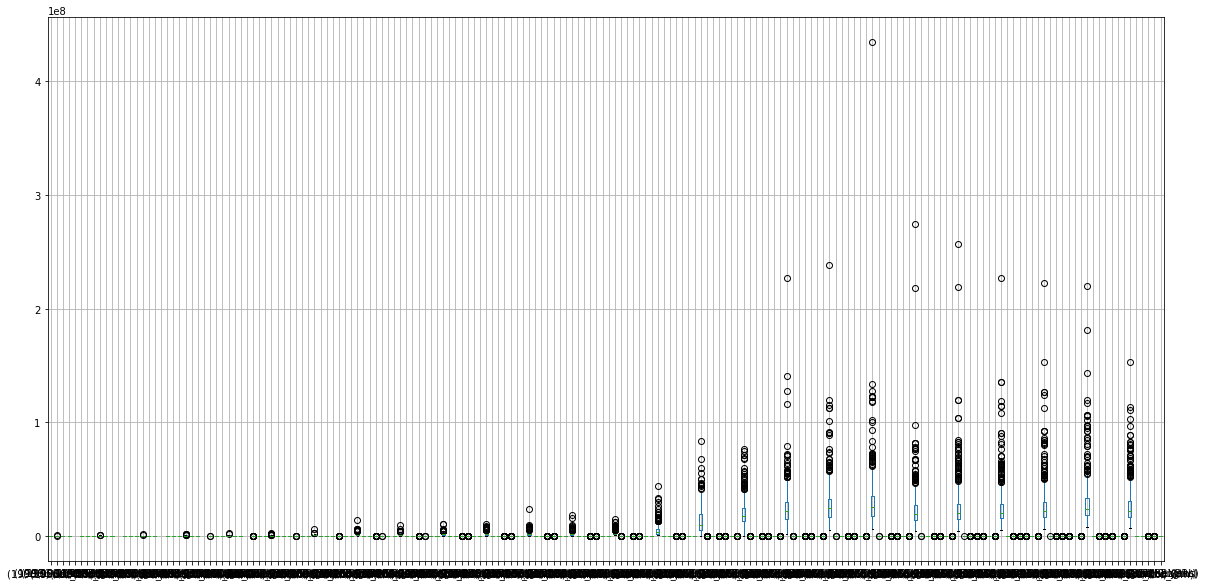

In [192]:
plt.figure(figsize=(20,10))
temp.groupby(temp['year'], as_index=False)['Lengths'].boxplot(subplots=False)
plt.show()

Text(0, 0.5, 'Number of Words')

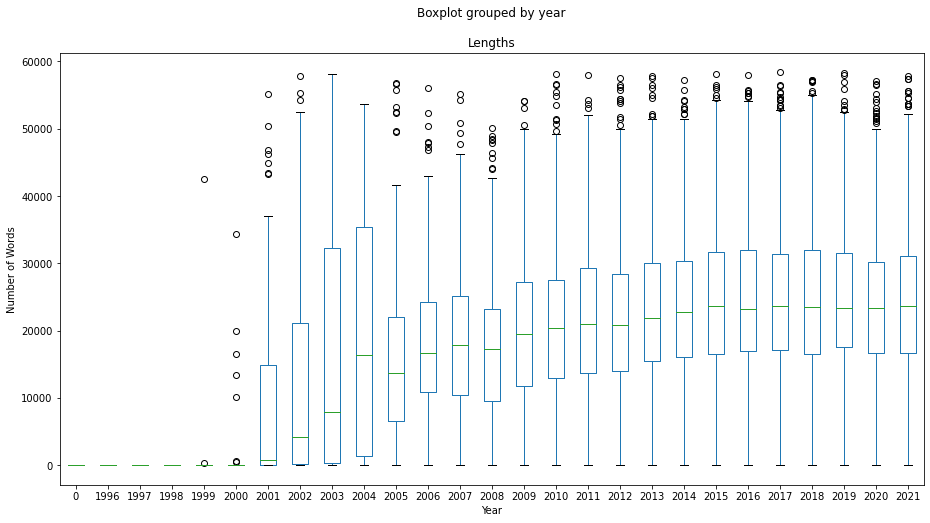

In [225]:
fig, ax = plt.subplots(figsize=(15,8))
ax = temp2.loc[:,['Lengths','year']].boxplot(by='year',ax=ax, grid=False)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Words')

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

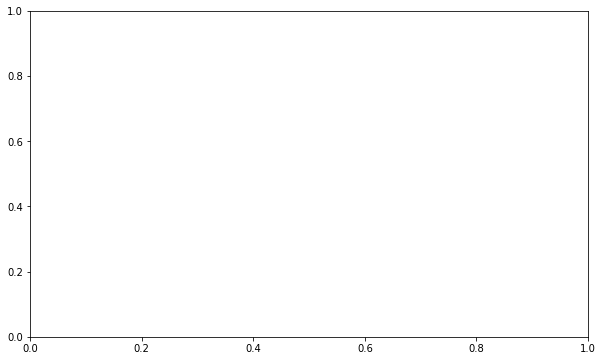

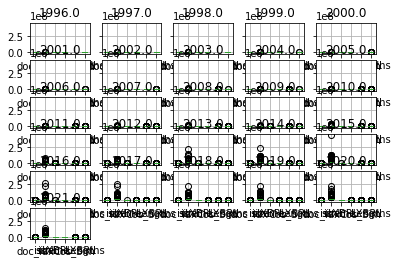

In [152]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.groupby(df['filingDate'].dt.year, as_index=False)['Lengths'].boxplot())
ax.set_xlabel('Year')
ax.set_ylabel('Average Number of Words per Excerpt')
plt.show()

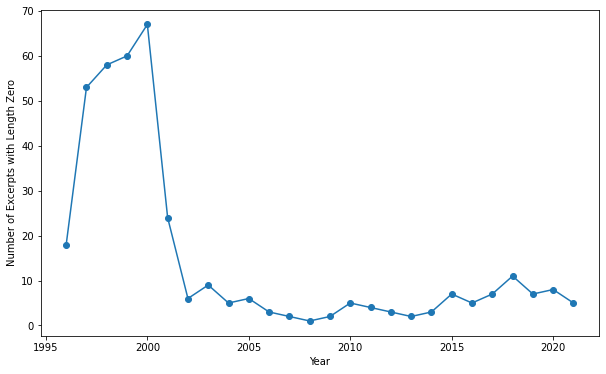

In [140]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.groupby(df['filingDate'].dt.year)['Lengths'].agg(lambda x: x.eq(2).sum()), marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Excerpts with Length Zero')
plt.show()

In [141]:
a = df.groupby(df['filingDate'].dt.year)['Lengths'].agg(lambda x: x.eq(2).sum())
a

filingDate
1996.0    18
1997.0    53
1998.0    58
1999.0    60
2000.0    67
2001.0    24
2002.0     6
2003.0     9
2004.0     5
2005.0     6
2006.0     3
2007.0     2
2008.0     1
2009.0     2
2010.0     5
2011.0     4
2012.0     3
2013.0     2
2014.0     3
2015.0     7
2016.0     5
2017.0     7
2018.0    11
2019.0     7
2020.0     8
2021.0     5
Name: Lengths, dtype: int64

In [142]:
b = df.groupby(df['filingDate'].dt.year)['Lengths'].count()

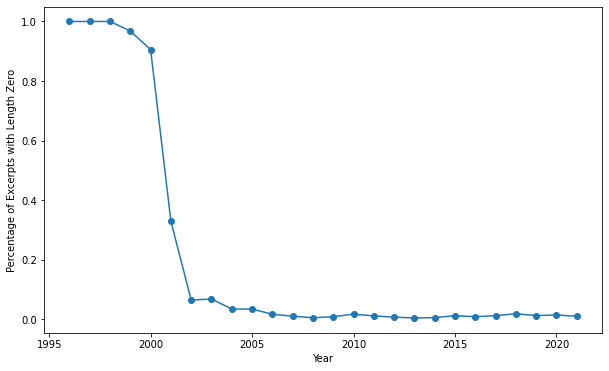

In [144]:
plt.figure(figsize=(10,6))
plt.plot(a / b, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Percentage of Excerpts with Length Zero')
plt.show()